# 1. Basic Statistics of the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import geopandas as gpd
import plotly.express as px
from matplotlib.lines import Line2D
from math import pi
from scipy.stats import skew

In [6]:
## check the whole 5 year data

qol = pd.read_csv("../02_data-wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv")
qol_scale = pd.read_csv("../02_data-wrangling/04_data//quality_of_life_index_5yrs_scale_geo.csv")

qol

,City,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Continent,Latitude,Longitude
0,Raleigh,United States,207.78,144.12,65.53,75.64,68.20,3.05,32.79,21.88,83.88,2022,North America,35.780398,-78.639099
1,Canberra,Australia,207.41,105.11,77.53,82.17,75.94,5.37,23.91,13.37,82.72,2022,Oceania,-35.297591,149.101268
2,Adelaide,Australia,204.87,104.24,70.71,80.75,76.59,4.26,24.18,18.17,94.96,2022,Oceania,-34.928181,138.599931
3,Columbus,United States,201.40,151.29,56.58,73.95,69.70,4.00,24.94,25.96,71.29,2022,North America,39.962260,-83.000707
4,Zurich,Switzerland,200.89,129.79,83.22,74.21,131.24,7.94,32.95,17.92,81.48,2022,Europe,47.374449,8.541042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Rio de Janeiro,Brazil,72.14,39.15,23.02,42.00,57.14,21.31,54.62,69.93,87.38,2018,Latin America,-22.911014,-43.209373
1139,Beijing,China,63.20,76.61,51.91,64.14,46.09,48.13,48.58,91.90,57.70,2018,Asia,39.906217,116.391276
1140,Dhaka,Bangladesh,61.58,37.72,29.43,39.95,33.64,14.07,55.53,94.15,71.29,2018,Asia,23.786198,90.402615
1141,Nairobi,Kenya,20.29,27.87,40.06,59.60,42.06,83.32,56.09,78.62,99.79,2018,Africa,-1.283253,36.817245


In [7]:
## check yearly data (unscaled)

# choose year
year = 2022

qol_yr = qol[(qol.Year==year)]

# checking statistics for each index

qol_yr.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality of Life Index,255.0,142.356627,35.801412,43.130000,117.075000,147.520000,170.625000,207.780000
Purchasing Power Index,255.0,74.442941,36.195851,8.300000,42.605000,73.880000,101.140000,172.980000
Safety Index,255.0,56.443098,15.013105,15.730000,46.205000,56.290000,68.125000,88.140000
Healthcare Index,255.0,67.261333,9.556091,38.380000,60.895000,68.560000,74.605000,87.420000
Cost of Living Index,255.0,58.068157,21.519702,20.750000,38.180000,63.440000,73.665000,131.240000
Property Price to Income Ratio,255.0,11.186000,8.399251,1.390000,5.640000,9.510000,13.760000,52.210000
Traffic Commute Time Index,255.0,35.863059,8.954114,16.360000,29.525000,34.690000,40.990000,66.780000
Pollution Index,255.0,50.072039,20.620955,13.010000,32.665000,49.260000,65.500000,95.370000
Climate Index,255.0,77.278000,17.379317,14.280000,66.855000,81.480000,90.410000,99.930000
Year,255.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000


In [8]:
## check yearly data (unscaled)

# choose year
year = 2022

qol_scale_yr = qol_scale[(qol_scale.Year==year)]

# checking statistics for each index

qol_scale_yr.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality of Life Index,255.0,60.265185,21.743949,0.000000e+00,44.910416,63.401154,77.433951,100.000000
Purchasing Power Index,255.0,40.164526,21.979506,0.000000e+00,20.831309,39.822686,56.376002,100.000000
Safety Index,255.0,56.225795,20.733469,0.000000e+00,42.086728,56.014363,72.358790,100.000000
Healthcare Index,255.0,58.893420,19.486320,0.000000e+00,45.911501,61.541599,73.868271,100.000000
Cost of Living Index,255.0,66.224856,19.476606,1.421085e-14,52.108788,61.363019,84.224817,100.000000
Property Price to Income Ratio,255.0,80.724124,16.527453,0.000000e+00,75.659189,84.022039,91.637151,100.000000
Traffic Commute Time Index,255.0,61.318804,17.759052,0.000000e+00,51.150337,63.645379,73.889330,100.000000
Pollution Index,255.0,54.999952,25.037585,0.000000e+00,36.267606,55.985915,76.135260,100.000000
Climate Index,255.0,73.552831,20.291088,0.000000e+00,61.383538,78.458844,88.884997,100.000000
Year,255.0,2022.000000,0.000000,2.022000e+03,2022.000000,2022.000000,2022.000000,2022.000000


<AxesSubplot:xlabel='Quality of Life Index', ylabel='Count'>

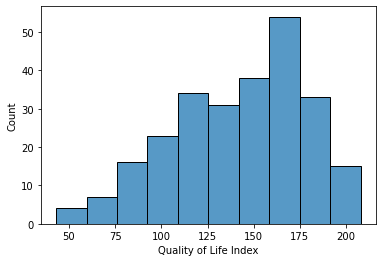

In [9]:
## check distributions of Quality of Life Index

# choose year
year = 2022

qol_yr = qol[(qol.Year==year)]

sn.histplot(qol_yr['Quality of Life Index'])

<Figure size 432x288 with 0 Axes>

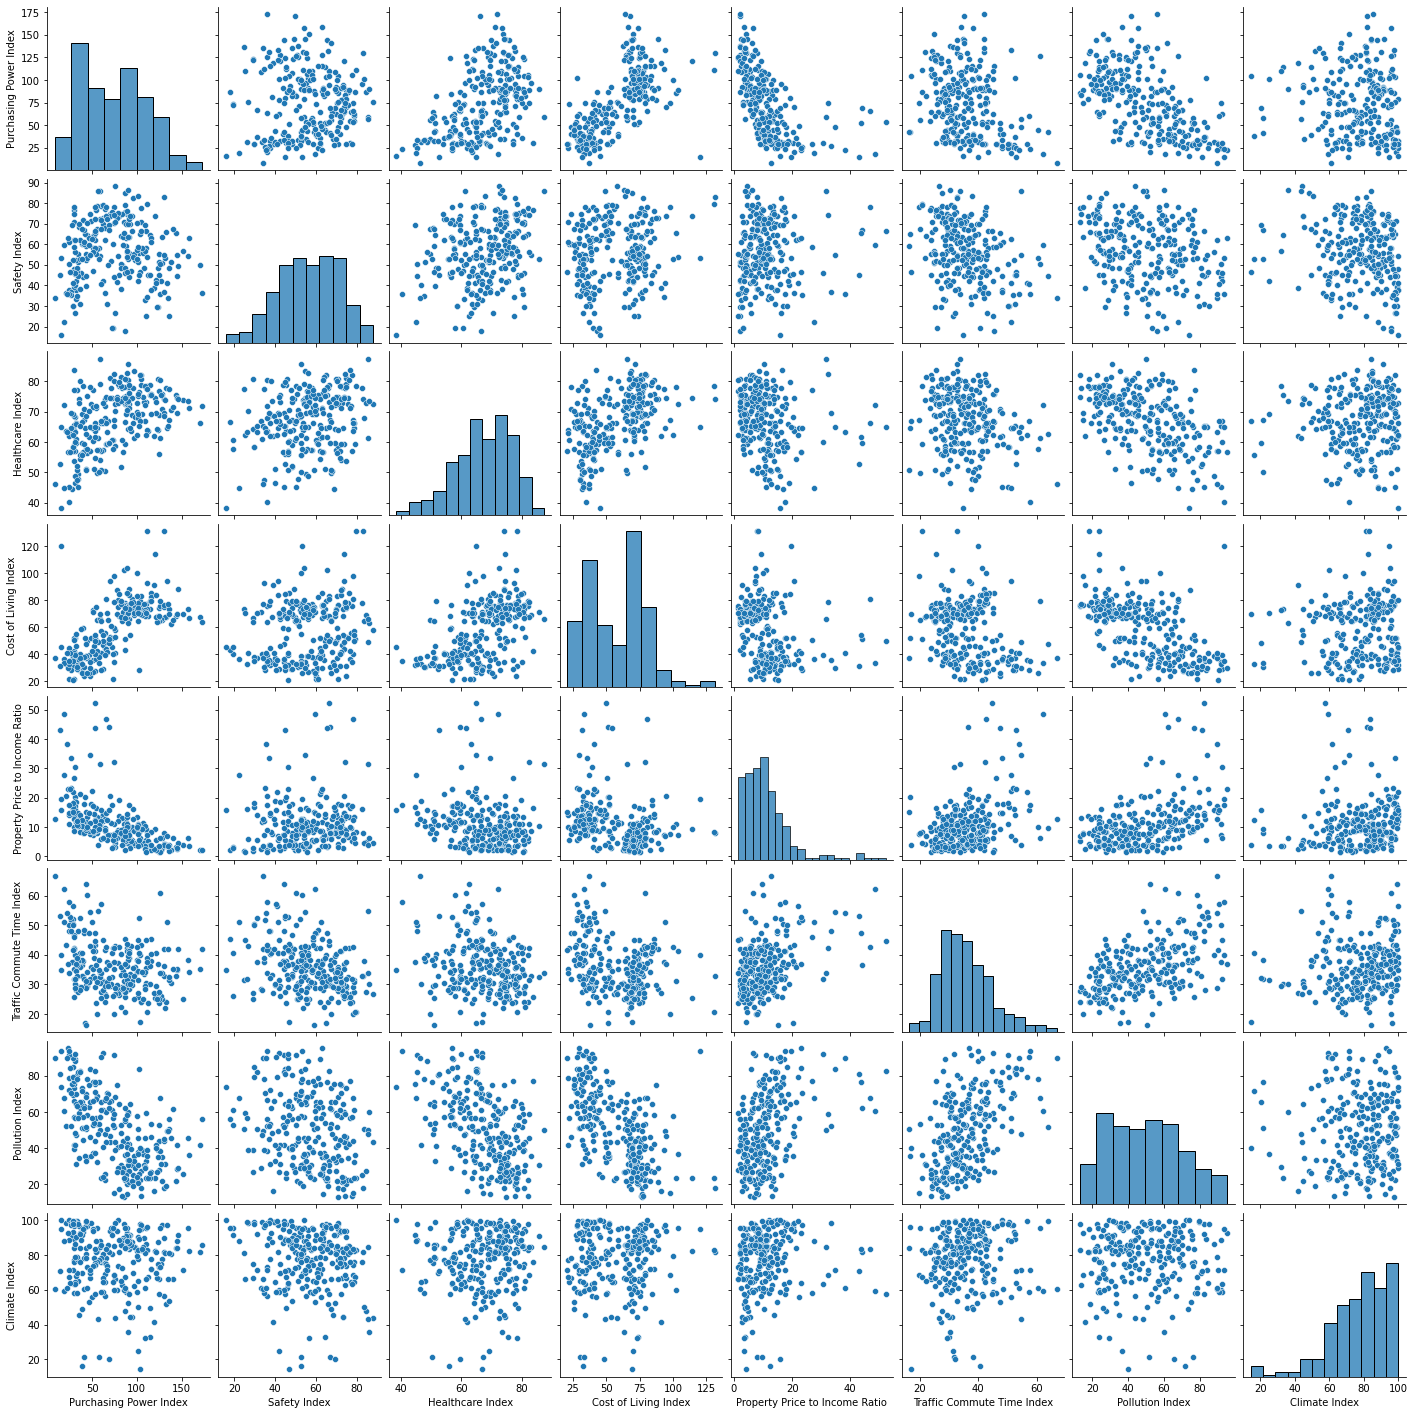

In [10]:
## pairplot for see correlations and distributions 

# choose year
year = 2022

qol_yr = qol[(qol.Year==year)]

plt.figure()
cols_to_plot = qol_yr.columns[3:11].tolist()
sn.pairplot(qol_yr[cols_to_plot])
plt.show()

<AxesSubplot:xlabel='Property Price to Income Ratio', ylabel='Count'>

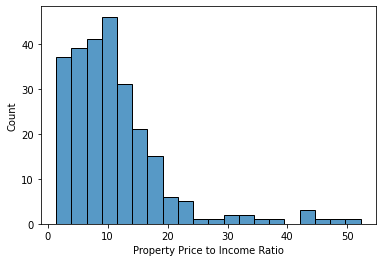

In [11]:
## check skewness of the extreme case

# choose year
year = 2022

qol_yr = qol[(qol.Year==year)]

sn.histplot(qol_yr['Property Price to Income Ratio'])

In [12]:
# check the excessivness of the skewness

skew(qol_yr['Property Price to Income Ratio'])

2.211548306532702

In [13]:
# finding cities of the excessive number

qol_yr.sort_values(by=['Property Price to Income Ratio'], ascending=False).head(15)

,City,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Continent,Latitude,Longitude
248,Beijing,China,65.18,53.08,66.64,64.86,49.53,52.21,44.61,82.59,57.64,2022,Asia,39.906217,116.391276
250,Colombo,Sri Lanka,62.58,18.58,59.59,72.05,33.62,48.45,62.17,60.41,59.11,2022,Asia,6.938747,79.854113
221,Hong Kong,Hong Kong,98.42,65.74,78.08,66.34,80.71,46.93,42.56,67.57,83.64,2022,Asia,22.279328,114.162813
216,Shenzhen,China,103.20,68.96,66.97,59.57,51.08,44.03,36.45,62.39,81.80,2022,Asia,22.544574,114.054543
239,Shanghai,China,82.66,53.00,65.68,61.64,53.90,43.81,47.42,76.50,83.64,2022,Asia,31.232276,121.469207
253,Tehran,Iran,46.26,14.55,45.14,52.69,31.47,42.99,53.06,81.29,70.99,2022,Asia,35.689252,51.389600
254,Manila,Philippines,43.13,22.24,35.61,63.26,40.77,38.30,54.02,89.86,61.23,2022,Asia,14.594891,120.978262
245,Mumbai,India,75.62,48.03,54.82,64.81,29.33,34.64,54.65,83.79,71.48,2022,Asia,19.075990,72.877393
226,Buenos Aires,Argentina,93.66,26.89,36.93,69.39,35.25,33.52,48.15,52.43,98.28,2022,Latin America,-34.607568,-58.437089
182,Seoul,South Korea,122.19,74.50,74.23,82.33,78.66,32.32,42.22,58.75,68.39,2022,Asia,37.566679,126.978291


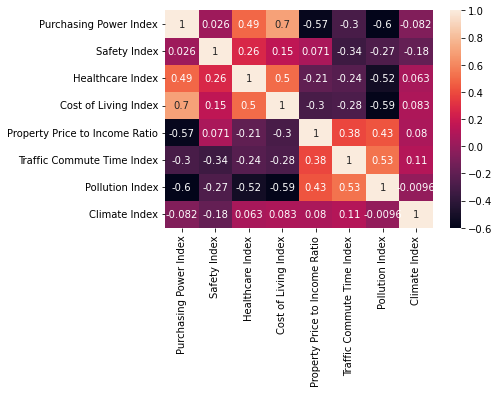

In [14]:
# Correlation heatmap between indexes(2022)

# choose year
year = 2022

qol_yr = qol[(qol.Year==year)]

cols_to_plot = qol_yr.columns[3:11].tolist()
corrMatrix = qol_yr[cols_to_plot].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
## average of indexes over years (world)

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_avg = qol.groupby(['Year'])[cols_indexes].mean().round(decimals=1)

qol_avg

,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Year,,,,,,,,,
2018,144.4,87.5,56.4,66.8,62.4,12.5,38.2,51.5,77.6
2019,145.8,84.0,56.9,67.0,56.8,11.7,36.5,50.3,77.6
2020,142.1,75.1,57.6,67.0,57.4,11.7,36.6,50.8,77.5
2021,139.4,67.7,56.6,67.1,60.0,11.1,36.1,50.2,77.1
2022,142.4,74.4,56.4,67.3,58.1,11.2,35.9,50.1,77.3
